In [7]:
# define the model
# play with the models (or not)
# model_name = "gemma2:9b"
# model_name = "qwen2.5-coder:7b"
# model_name = "llama3.1:latest"  #7b
# model_name = "llama3.2:3b"
# model_name = "llama3.2:1b"
# model_name = "tinyllama:latest"

In [11]:
import requests
import ipywidgets as widgets
from IPython.display import display, clear_output

# Step 1: Define a list of models you want to test
predefined_models = ["llama2:7b", "tinyllama:latest", "llama3.2:1b", "llama3.2:3b", "llama3.1:latest", "qwen2.5-coder:7b", "gemma2:9b", "mistral:latest", "codellama"]

# Function to validate if a model is available
def validate_models(models):
    available_models = []
    for model in models:
        try:
            # Test if the model works by making a quick call
            print("testing model - ", model)
            response = requests.post(
                "http://localhost:11434/api/generate",
                json={"model": model, "prompt": "Test"}
            )
            if response.status_code == 200:
                available_models.append(model)
        except requests.RequestException:
            pass  # Ignore models that fail
    return available_models

# Step 2: Display the models as checkboxes
def display_model_selection(models):
    # Create a checkbox for each model
    checkboxes = {model: widgets.Checkbox(value=True, description=model) for model in models}
    checkbox_widgets = widgets.VBox(list(checkboxes.values()))
    
    # Button to confirm selection
    confirm_button = widgets.Button(description="Confirm Selection")
    output = widgets.Output()

    def on_confirm_clicked(b):
        with output:
            clear_output()
            selected_models = [model for model, checkbox in checkboxes.items() if checkbox.value]
            print("Selected Models:", selected_models)
            # Store or return the selected models
            global selected_model_list
            selected_model_list = selected_models

    confirm_button.on_click(on_confirm_clicked)
    
    # Display the checkboxes and button
    display(checkbox_widgets, confirm_button, output)

# Step 3: Validate and display models
validated_models = validate_models(predefined_models)
if validated_models:
    print("Available Models:")
    display_model_selection(validated_models)
else:
    print("No valid models found on the Ollama instance.")


testing model -  llama2:7b
testing model -  tinyllama:latest
testing model -  llama3.2:1b
testing model -  llama3.2:3b
testing model -  llama3.1:latest
testing model -  qwen2.5-coder:7b
testing model -  gemma2:9b
testing model -  mistral:latest
testing model -  codellama
Available Models:


Button(description='Confirm Selection', style=ButtonStyle())

Output()

In [13]:
from string import Template

# Step 1: Define the static prompt template
# The template contains placeholders for dynamic values
prompt_template = Template(
    """
    You are an assistant specializing in JSON Web Token (JWT) security testing.
    Use the following context to identify potential vulnerabilities and suggest mitigations.
    
    Context:
    $context

    Question:
    $question
    """
)

# Step 2: Hardcode the context and question
context = "JWT with none algorithm and weak secret key. Signature appears tampered."
question = "What are the security risks of this JWT?"

# Step 3: Generate the prompt by substituting the template placeholders
generated_prompt = prompt_template.substitute(context=context, question=question)

# Step 4: Display the generated prompt
print("Generated Prompt:")
print(generated_prompt)


Generated Prompt:

    You are an assistant specializing in JSON Web Token (JWT) security testing.
    Use the following context to identify potential vulnerabilities and suggest mitigations.
    
    Context:
    JWT with none algorithm and weak secret key. Signature appears tampered.

    Question:
    What are the security risks of this JWT?
    


In [19]:
import requests
import time
import json

# Step 1: Selected models (from Step 2)
# selected_models = ["llama2", "gemma-9b"]  # Replace with your dynamically selected models
# selected_models = ["llama2:7b", "tinyllama:latest", "llama3.2:1b", "llama3.2:3b", "llama3.1:latest", "qwen2.5-coder:7b", "gemma2:9b", "mistral:latest", "codellama"}
selected_models = ["tinyllama:latest", "llama3.2:1b", "llama3.2:3b", "codellama"]


# Step 2: API endpoint
OLLAMA_API_URL = "http://localhost:11434/api/generate"

# Step 3: Run the prompt against each model
results = []  # Store results for each model
for model in selected_models:
    print(f"Testing model: {model}")
    
    try:
        # Measure the start time
        start_time = time.time()
        
        # Send the prompt to the Ollama API (streaming enabled)
        response = requests.post(
            OLLAMA_API_URL,
            json={
                "model": model,
                "prompt": generated_prompt,
                "stream": True
            },
            stream=True  # Enable streaming response
        )
        
        response.raise_for_status()  # Raise an error for bad responses
        
        # Collect the streamed response
        output_text = ""
        for chunk in response.iter_lines():
            if chunk:
                # Parse each chunk as JSON
                chunk_data = json.loads(chunk.decode('utf-8'))
                # Append the "response" field to the output
                output_text += chunk_data.get("response", "")
                # Stop if "done" is true
                if chunk_data.get("done", False):
                    break
        
        # Measure the end time
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Log the result
        results.append({
            "model": model,
            "response_time": elapsed_time,
            "generated_response": output_text
        })
        
        # Print the response
        print(f"Response from {model}:\n{output_text}\n")
        print(f"Time taken: {elapsed_time:.2f} seconds\n")
    
    except requests.RequestException as e:
        print(f"Error testing model {model}: {e}")

# Step 4: Display the results
print("Summary of Results:")
for result in results:
    print(f"Model: {result['model']}")
    print(f"Response Time: {result['response_time']:.2f} seconds")
    print(f"Generated Response:\n{result['generated_response']}\n")

Testing model: tinyllama:latest
Response from tinyllama:latest:
The security risk of this JWT is that it may be vulnerable to attacks such as token injection, header manipulation, and signature forgery. In particular, if the secret key used for signing the JWT is weak or contains a vulnerability, this could allow attackers to bypass the security measures in place to protect the JWT data.

Additionally, the absence of an algorithmic protection mechanism may make it more susceptible to attacks like "token tampering" where the attacker modifies the token and causes it to appear legitimate to another party. This can be exploited by an attacker to gain access to sensitive information or resources.

In short, this JWT with a weak secret key would pose significant risks to security, and should be reviewed for these potential vulnerabilities before being used in any application or system.

Time taken: 1.06 seconds

Testing model: llama3.2:1b
Response from llama3.2:1b:
Identifying Potential Vul

Results Table:
              model  response_time  \
0  tinyllama:latest       1.062350   
1       llama3.2:1b       8.877272   
2       llama3.2:3b       9.737983   
3         codellama       9.635653   

                                  generated_response  
0  The security risk of this JWT is that it may b...  
1  Identifying Potential Vulnerabilities in a JWT...  
2  The presence of a JWT with a None algorithm an...  
3    The security risks of a JWT with a none algo...  


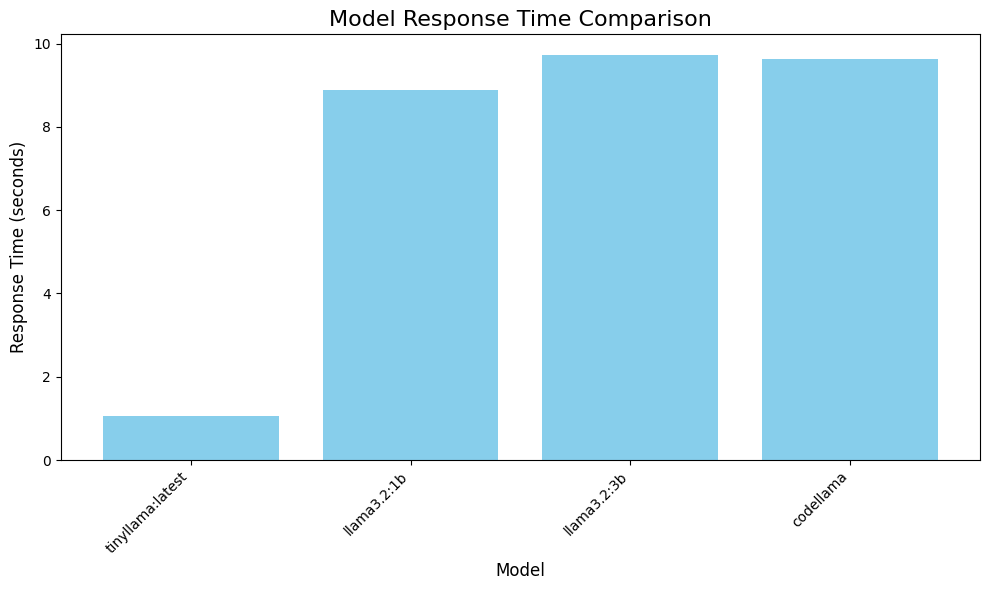

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert results into a pandas DataFrame
df = pd.DataFrame(results)

# Step 2: Display the results in tabular form
print("Results Table:")
print(df)

# Step 3: Plot the response times
plt.figure(figsize=(10, 6))
plt.bar(df['model'], df['response_time'], color='skyblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Response Time (seconds)', fontsize=12)
plt.title('Model Response Time Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
